In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **1, 2. Download and Load the data**

In [2]:
dataset = pd.read_csv("/Churn_Modelling.csv")

# **3a. Univariate Analysis**

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

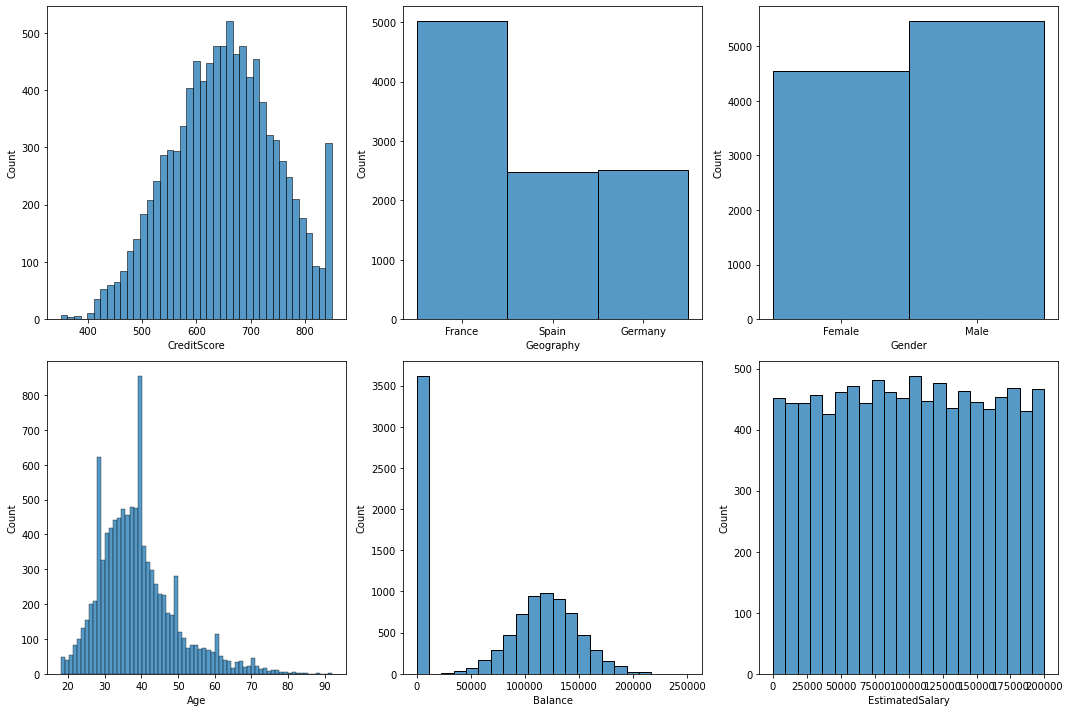

In [5]:
cols = 3
rows = 2
hist_cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Balance','EstimatedSalary']
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(hist_cols): 
    ax=fig.add_subplot(rows,cols,i+1)  
    sns.histplot(x = dataset[col], ax = ax)
fig.tight_layout()  
plt.show()


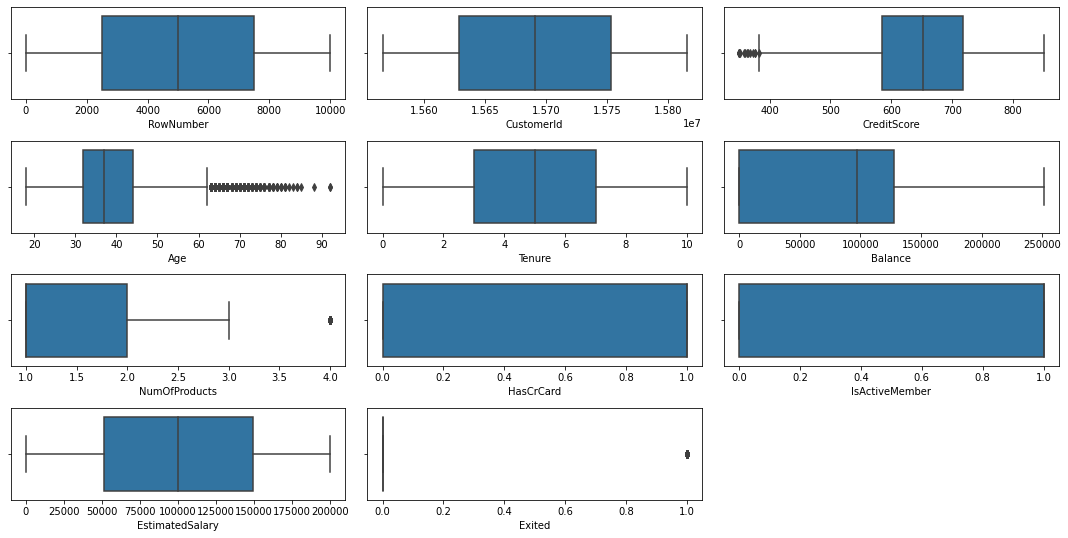

In [6]:
cols = 3
rows = 5
num_cols = dataset.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.boxplot(x=dataset[col], ax=ax)
fig.tight_layout()  
plt.show()


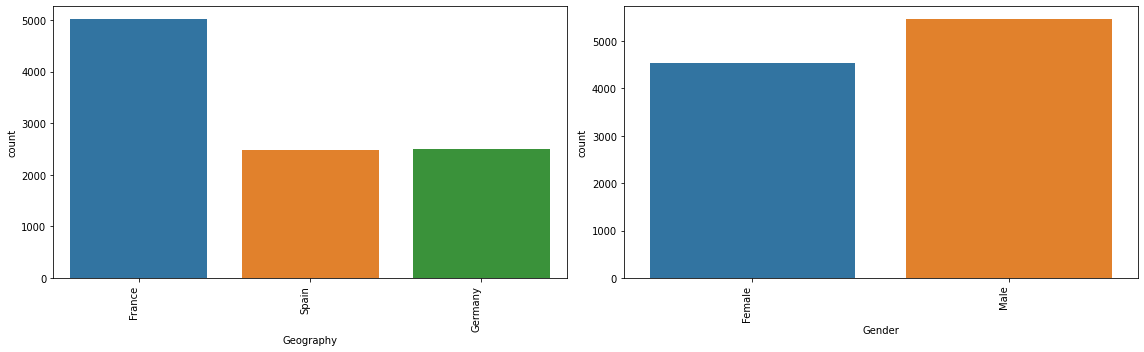

In [7]:
cols = 2
rows = 1
fig = plt.figure(figsize= (16,5))
all_cats = dataset.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 10]
for i, col in enumerate(cat_cols):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=dataset[col], ax=ax)
    plt.xticks(rotation=90, ha='right')
    
fig.tight_layout()  
plt.show()

# **3b. Bivariate** **Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


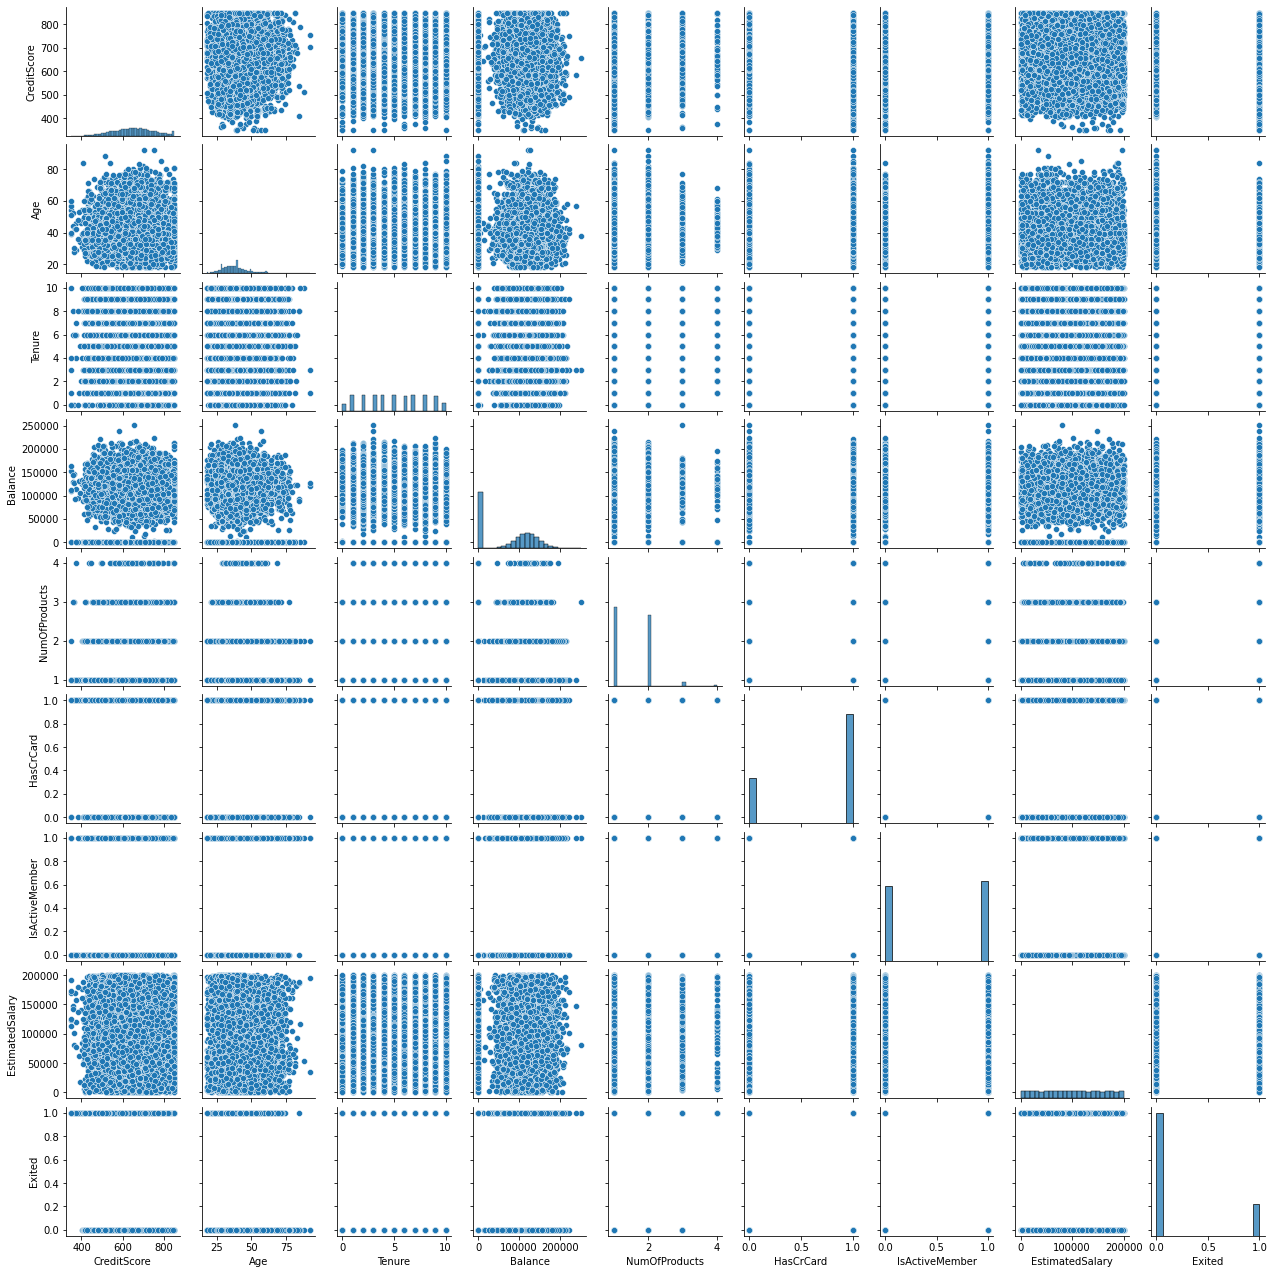

In [8]:
cols = ['CreditScore','Geography','Gender','Age','Tenure','Balance',
        'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Exited']     
sns.pairplot(dataset[cols], size=2.0)

In [9]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


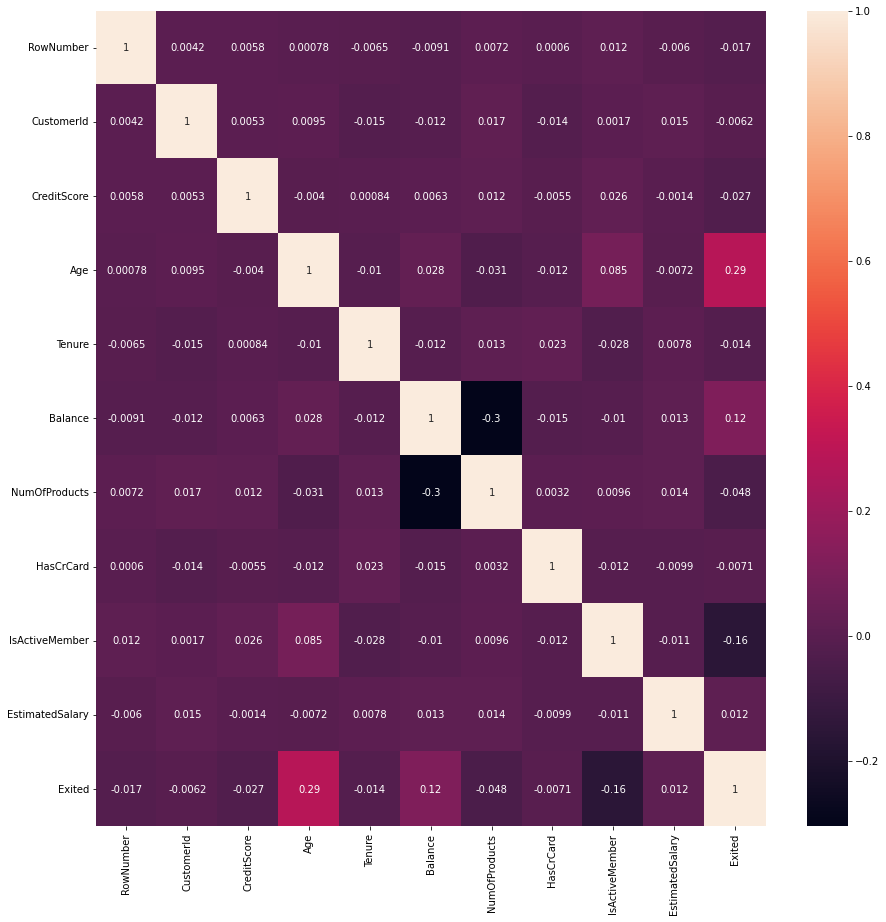

In [10]:
fig = plt.figure(figsize= (15,15))
sns.heatmap(dataset.corr(), annot=True)

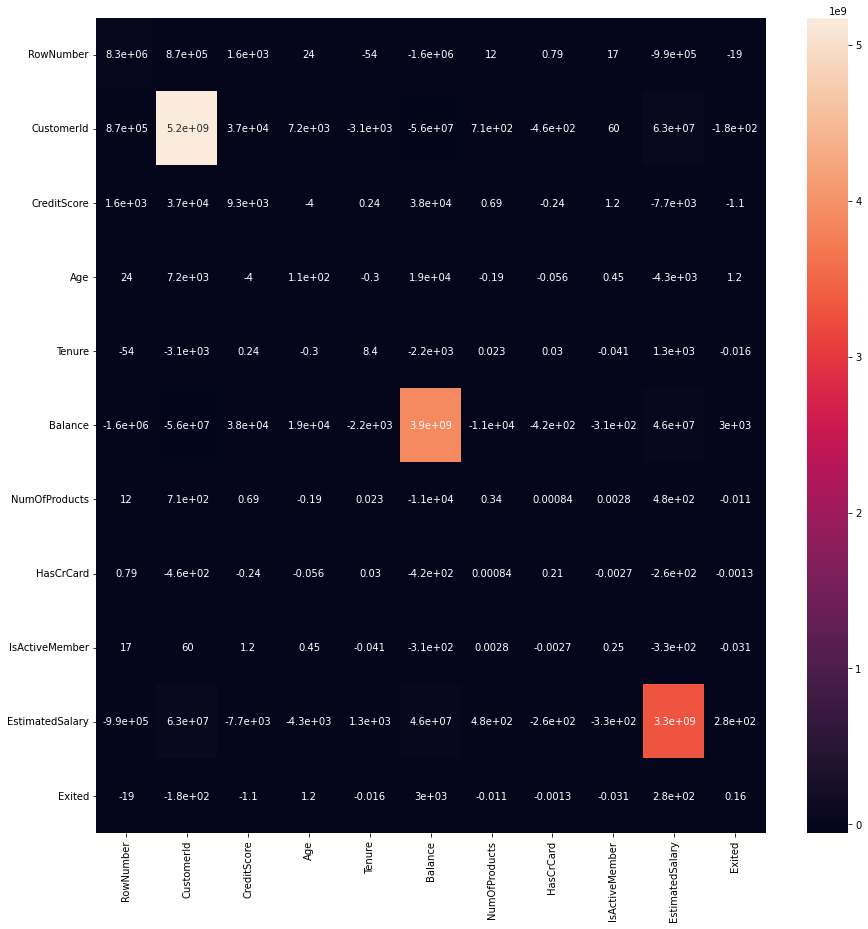

In [11]:
fig = plt.figure(figsize= (15,15))
sns.heatmap(dataset.cov(), annot=True)


# **3c. Multi Variate Analysis**



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


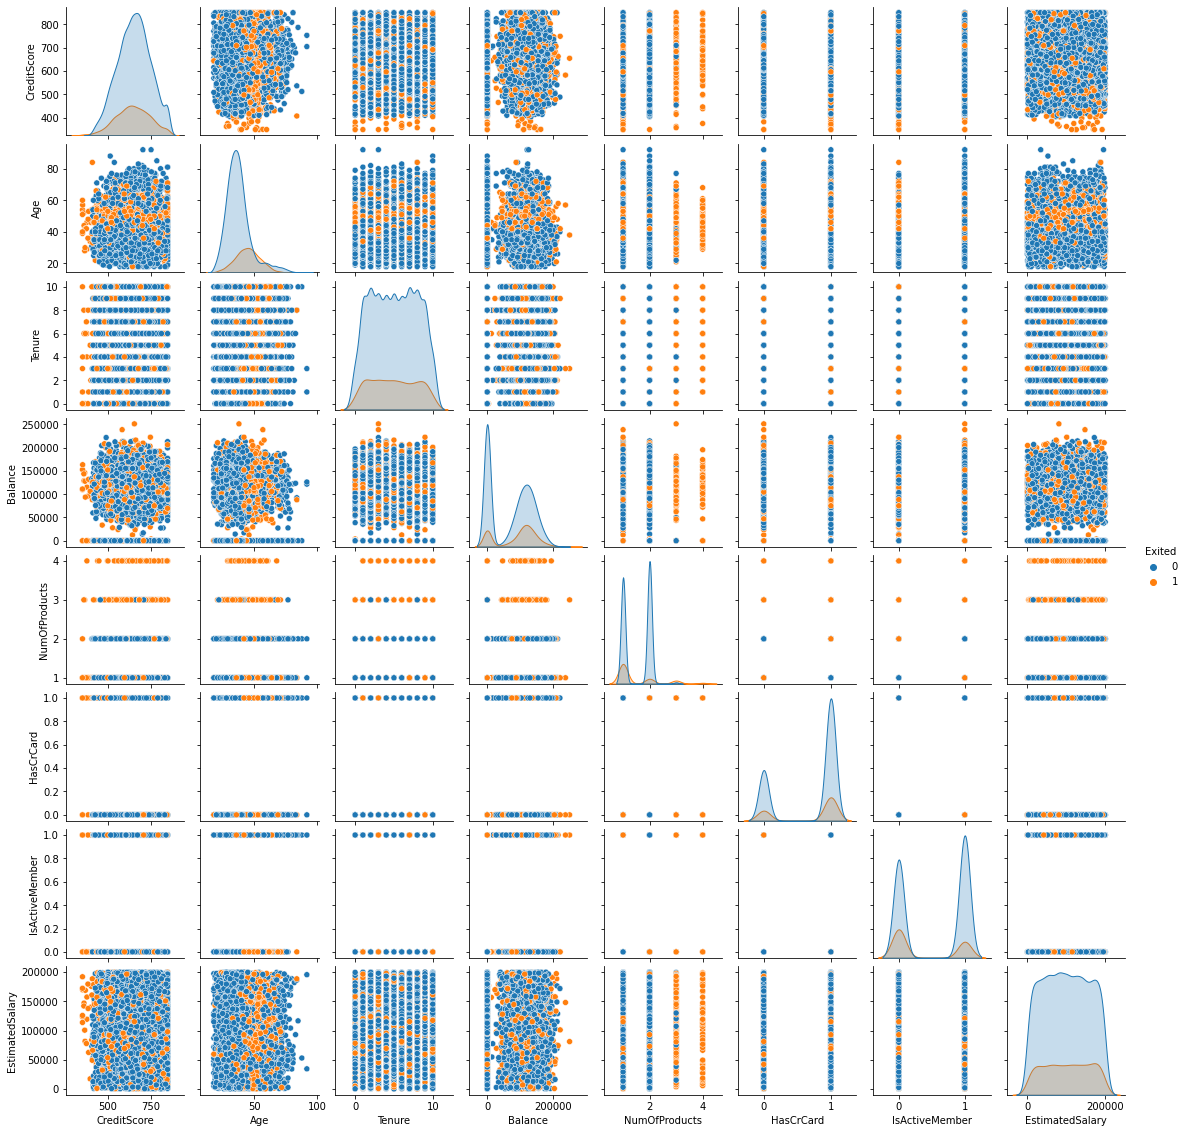

In [12]:
cols = ['CreditScore','Geography','Gender','Age','Tenure','Balance',
        'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']     
sns.pairplot(dataset[cols], size=2.0, hue='Exited')

# **4. Descriptive Statistics**

In [13]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
print(dataset.describe(include=['object']))

       Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457


In [15]:
print(dataset.describe(include='all'))

          RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count 

# **5. Handling missing values**

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
print(dataset.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [18]:
dataset = dataset.dropna(axis=1)

# **6. Detecting and removing outliers**

In [19]:
#Finding outliers using inter quartile value
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64


In [20]:
print("Shape before outlier treatment", dataset.shape)

Shape before outlier treatment (10000, 14)


In [21]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [22]:
print("Shape after outlier treatment", dataset.shape)

Shape after outlier treatment (7677, 14)


# **7. Check for Categorical columns and perform encoding.**

In [23]:
all_cats = dataset.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 10]

In [24]:
#OneHotCoding
pd.get_dummies(dataset, columns=cat_cols).head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1


# **8. Split the data into dependent and independent variables.**


In [25]:
X = dataset.iloc[:, :-1]
print(X)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
1             2    15647311       Hill          608     Spain  Female   41   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
6             7    15592531   Bartlett          822    France    Male   50   
8             9    15792365         He          501    France    Male   44   
...         ...         ...        ...          ...       ...     ...  ...   
9993       9994    15569266     Rahman          644    France    Male   28   
9994       9995    15719294       Wood          800    France  Female   29   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [26]:
Y = dataset.iloc[:, -1]
print(Y)

1       0
3       0
4       0
6       0
8       0
       ..
9993    0
9994    0
9995    0
9996    0
9999    0
Name: Exited, Length: 7677, dtype: int64


# **9. Scale the independent variables**

In [27]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scale_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [30]:
scaler = StandardScaler()
X[scale_cols] = scaler.fit_transform(X[scale_cols])

In [31]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,2,15647311,Hill,-0.455004,Spain,Female,0.599817,-1.403186,0.174070,-1.072759,0,1,0.221181
3,4,15701354,Boni,0.496133,France,Female,0.350214,-1.403186,-1.159714,0.892771,0,0,-0.104937
4,5,15737888,Mitchell,2.074392,Spain,Female,0.849420,-1.055481,0.837764,-1.072759,1,1,-0.361820
6,7,15592531,Bartlett,1.781735,France,Male,1.723029,0.683046,-1.159714,0.892771,1,1,-1.564488
8,9,15792365,He,-1.573373,France,Male,0.974221,-0.360070,1.100999,0.892771,0,1,-0.434020


# **10. Split the data into training and testing**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5143, 13) (2534, 13) (5143,) (2534,)
